# Building a PyTorch Model

## 1. Data
Let's create a data for our model

In [6]:
# import required model
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1'

In [8]:
# Create weight and bias
weight = 0.7
bias = 0.3

#Create a range value
start = 0
end = 3
step = 0.02

#Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [16]:
# Visualization function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #PLot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    #plot the predections in red if available
    if predictions is not None:
        plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")
    
    #show the legend
    plt.legend(prop={"size": 14})

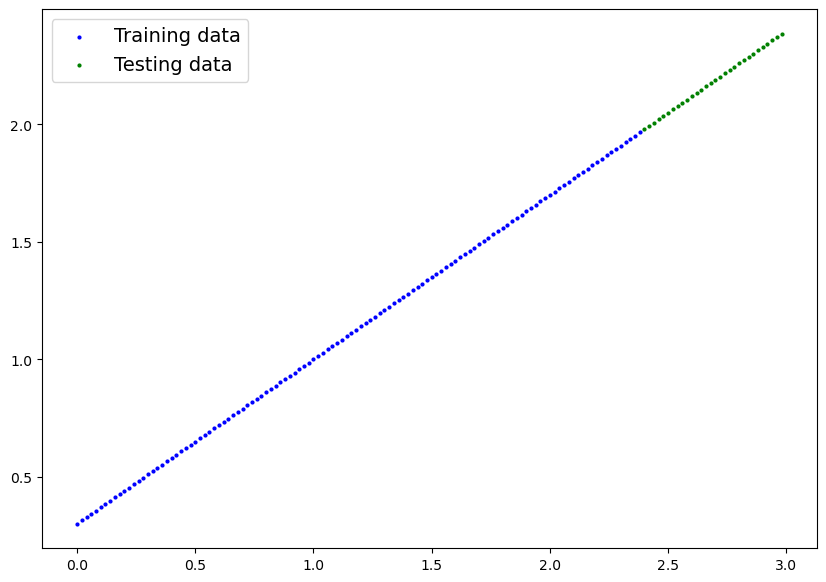

In [20]:
plot_predictions(X_train, y_train, X_test, y_test)

### 2. Building a model

In [22]:
# Subclass nn.Module to make our Model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    #Define the forward computation
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [24]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

## Training

In [31]:
# Create loss function
loss_fn = nn.L1Loss()

# Create a optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [39]:
# Set the epochs
epochs = 1000
for epoch in range(epochs):
    # Training
    model_1.train()
    
     # 1. Forward pass
    y_pred = model_1(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad optimizer
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()


    # Testing
    model_1.eval()
    # 1. Forward Pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 ==0:
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5826478600502014 | Test Loss: 0.6195945739746094
Epoch: 100 | Train Loss: 0.02990887500345707 | Test Loss: 0.05028025805950165
Epoch: 200 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 300 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 400 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 500 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 600 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 700 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 800 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576
Epoch: 900 | Train Loss: 0.007169409655034542 | Test Loss: 0.03547872230410576


In [41]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6996]])),
             ('linear_layer.bias', tensor([0.3077]))])

### Making predections

In [44]:
# Turn the model into evaluation mode
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds[:10]

tensor([[1.9867],
        [2.0006],
        [2.0146],
        [2.0286],
        [2.0426],
        [2.0566],
        [2.0706],
        [2.0846],
        [2.0986],
        [2.1126]])

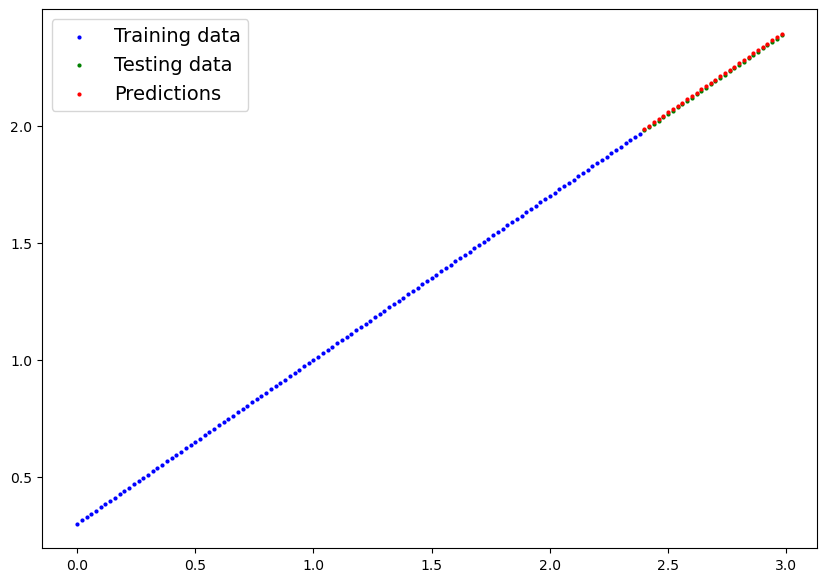

In [46]:
plot_predictions(predictions=y_preds)

### Saving and loading the model

In [49]:
from pathlib import Path
# 1. Create Models directory
MODEL_PATH = Path("models1")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_LinearModel_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models1/01_LinearModel_1.pth


In [51]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

#Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(f"Loaded model:\n{loaded_model_1}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


/tmp/ipykernel_25613/639538637.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [53]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [55]:
print("Well done")

Well done
